In [ ]:
!pip install simpy

In [ ]:
import simpy
import random

# Definir las probabilidades para el tiempo entre llegadas de los clientes
prob_tiempo_entre_llegadas = [0.4, 0.3, 0.3]
tamanio_grupo = [1, 2, 3]

# Definir las probabilidades para el número de órdenes por persona
# (5 tacos)
prob_ordenes_por_persona = [0.2, 0.65, 0.15]
ordenes_por_persona = [0, 1, 2]

# Definir las probabilidades para el tiempo de consumo por orden
prob_tiempo_consumo_por_orden = [0.1, 0.4, 0.3, 0.2]
tiempo_consumo_por_orden = [10, 15, 20, 25]

# Definir otros parámetros
NUM_MESAS_PEQUENAS = 4
NUM_MESAS_GRANDES = 2
PRECIO_POR_ORDEN = 400
COSTO_POR_ORDEN = 200
SALARIO_MESERO_POR_HORA = 3000

class Taqueria:
    def __init__(self, env):
        self.env = env
        self.mesas_disponibles = simpy.Resource(env, capacity=NUM_MESAS_PEQUENAS + NUM_MESAS_GRANDES)
        self.salario_mesero_por_hora = SALARIO_MESERO_POR_HORA

    def atender_cliente(self, cliente):
        # Simular la atención al cliente
        ordenes = random.choice(ordenes_por_persona)
        tiempo_consumo = random.choice(tiempo_consumo_por_orden)
        yield self.env.timeout(tiempo_consumo * ordenes)
        total_precio = ordenes * PRECIO_POR_ORDEN
        total_costo = ordenes * COSTO_POR_ORDEN
        print(f"Cliente {cliente} consumió {ordenes} orden(es) en {tiempo_consumo} minutos. Precio total: ${total_precio}, Costo total: ${total_costo}")

def llegada_cliente(env, taqueria):
    while True:
        # Esperar el tiempo entre llegadas de clientes
        yield env.timeout(random.choices(tamanio_grupo, weights=prob_tiempo_entre_llegadas)[0])
        # Crear un nuevo cliente
        env.process(ordenar_comida(env, taqueria))

def ordenar_comida(env, taqueria):
    # Solicitar una mesa
    with taqueria.mesas_disponibles.request() as mesa:
        yield mesa
        # Atender al cliente
        yield env.process(taqueria.atender_cliente(env.now))

# Configurar y ejecutar la simulación
env = simpy.Environment()
taqueria = Taqueria(env)
env.process(llegada_cliente(env, taqueria))
env.run(until=120)  # Simular durante 2 horas (120 minutos)


Cliente 8 consumió 0 orden(es) en 20 minutos. Precio total: $0, Costo total: $0
Cliente 3 consumió 1 orden(es) en 20 minutos. Precio total: $400, Costo total: $200
Cliente 23 consumió 0 orden(es) en 20 minutos. Precio total: $0, Costo total: $0
Cliente 4 consumió 1 orden(es) en 20 minutos. Precio total: $400, Costo total: $200
Cliente 24 consumió 0 orden(es) en 10 minutos. Precio total: $0, Costo total: $0
Cliente 12 consumió 2 orden(es) en 10 minutos. Precio total: $800, Costo total: $400
Cliente 10 consumió 1 orden(es) en 25 minutos. Precio total: $400, Costo total: $200
Cliente 6 consumió 2 orden(es) en 20 minutos. Precio total: $800, Costo total: $400
Cliente 46 consumió 0 orden(es) en 10 minutos. Precio total: $0, Costo total: $0
Cliente 46 consumió 0 orden(es) en 25 minutos. Precio total: $0, Costo total: $0
Cliente 24 consumió 1 orden(es) en 25 minutos. Precio total: $400, Costo total: $200
Cliente 49 consumió 0 orden(es) en 25 minutos. Precio total: $0, Costo total: $0
Cliente 

### Ahora produce informe

In [ ]:
import simpy
import random
import math

# Definir las probabilidades para el tiempo entre llegadas de los clientes
def f_tiempo_entre_llegadas(t):
    return (1/6) * math.exp(-t/6)

# Definir las probabilidades para el tamaño de los grupos
prob_tamano_grupo = [0.4, 0.3, 0.3]
tamanio_grupo = [1, 2, 3]

# Definir las probabilidades para el número de órdenes por persona
prob_ordenes_por_persona = [0.2, 0.65, 0.15]
ordenes_por_persona = [0, 1, 2]

# Definir las probabilidades para el tiempo de consumo por orden
prob_tiempo_consumo_por_orden = [0.1, 0.4, 0.3, 0.2]
tiempo_consumo_por_orden = [10, 15, 20, 25]

# Definir otros parámetros
NUM_MESAS_PEQUENAS = 4
NUM_MESAS_GRANDES = 2
PRECIO_POR_ORDEN = 400
COSTO_POR_ORDEN = 200
SALARIO_MESERO_POR_HORA = 3000

class Taqueria:
    def __init__(self, env):
        self.env = env
        self.mesas_disponibles = simpy.Resource(env, capacity=NUM_MESAS_PEQUENAS + NUM_MESAS_GRANDES)
        self.salario_mesero_por_hora = SALARIO_MESERO_POR_HORA
        self.utilidad_total = 0
        self.clientes_en_cola = 0
        self.max_clientes_en_cola = 0
        self.tiempo_total_espera = 0
        self.tiempo_total_comida = 0
        self.tiempo_total_llegadas = 0
        self.num_clientes = 0

    def atender_cliente(self, cliente):
        # Simular la atención al cliente
        ordenes = random.choices(ordenes_por_persona, weights=prob_ordenes_por_persona)[0]
        if ordenes == 0:
            tiempo_consumo = 0
            print(f"Tiempo: {self.env.now}. Cliente {cliente} no hizo ninguna orden y dejó la taquería.")
            return
        tiempo_consumo = random.choices(tiempo_consumo_por_orden, weights=prob_tiempo_consumo_por_orden)[0]

        yield self.env.timeout(tiempo_consumo * ordenes)
        total_precio = ordenes * PRECIO_POR_ORDEN
        total_costo = ordenes * COSTO_POR_ORDEN

        print(f"Tiempo: {self.env.now}. Cliente {cliente} consumió {ordenes} orden(es) en {tiempo_consumo} minutos. Precio total: ${total_precio}, Costo total: ${total_costo}")

        utilidad = total_precio - total_costo
        self.utilidad_total += utilidad
        self.clientes_en_cola -= 1
        tiempo_espera = self.env.now - cliente
        self.tiempo_total_espera += tiempo_espera
        self.tiempo_total_comida += tiempo_consumo * ordenes

    def llegada_cliente(self, cliente):
        # Calcular número de clientes en cola
        self.clientes_en_cola += 1
        if self.clientes_en_cola > self.max_clientes_en_cola:
            self.max_clientes_en_cola = self.clientes_en_cola

    def tiempo_entre_llegadas(self):
        # Calcular tiempo total entre llegadas
        self.tiempo_total_llegadas += self.env.now

def llegada_cliente(env, taqueria):
    while True:
        # Esperar el tiempo entre llegadas de clientes
        yield env.timeout(random.expovariate(1/6))  # Utilizar una distribución exponencial con lambda = 1/6
        tamano_grupo = random.choices(tamanio_grupo, weights=prob_tamano_grupo)[0]
        print(f"Tiempo: {env.now}. Llegó un nuevo grupo de {tamano_grupo} personas.")

        # Crear nuevos clientes para el grupo
        for _ in range(tamano_grupo):
            cliente = env.now
            taqueria.num_clientes += 1
            taqueria.llegada_cliente(cliente)
            env.process(ordenar_comida(env, taqueria, cliente))

def ordenar_comida(env, taqueria, cliente):
    # Solicitar una mesa
    with taqueria.mesas_disponibles.request() as mesa:
        yield mesa
        # Atender al cliente
        yield env.process(taqueria.atender_cliente(cliente))

# Configurar y ejecutar la simulación
env = simpy.Environment()
taqueria = Taqueria(env)
env.process(llegada_cliente(env, taqueria))
env.run(until=120)  # Simular durante 2 horas (120 minutos)

# Calcular resultados
utilidad_total = taqueria.utilidad_total
probabilidad_sin_mesa = taqueria.max_clientes_en_cola / taqueria.num_clientes
max_clientes_en_cola = taqueria.max_clientes_en_cola
tiempo_promedio_espera = taqueria.tiempo_total_espera / taqueria.num_clientes
tiempo_promedio_comida_grupo = taqueria.tiempo_total_comida / taqueria.num_clientes
tamano_grupo_promedio = sum(tamanio_grupo[i] * prob_tamano_grupo[i] for i in range(len(tamanio_grupo)))
tiempo_entre_llegadas_promedio = taqueria.tiempo_total_llegadas / taqueria.num_clientes

# Imprimir resultados
print(f"Utilidad total: ${utilidad_total}")
print(f"Probabilidad de no encontrar mesa disponible: {probabilidad_sin_mesa}")
print(f"Número máximo de clientes en la cola: {max_clientes_en_cola}")
print(f"Tiempo promedio de espera en la cola: {tiempo_promedio_espera} minutos")
print(f"Tiempo promedio de comida por grupo: {tiempo_promedio_comida_grupo} minutos")
print(f"Tamaño de grupo promedio: {tamano_grupo_promedio}")
print(f"Tiempo entre llegadas promedio: {tiempo_entre_llegadas_promedio} minutos")


Tiempo: 7.991496422466271. Llegó un nuevo grupo de 1 personas.
Tiempo: 8.980911853122985. Llegó un nuevo grupo de 1 personas.
Tiempo: 11.093277154343477. Llegó un nuevo grupo de 2 personas.
Tiempo: 15.006133382454315. Llegó un nuevo grupo de 2 personas.
Tiempo: 22.99149642246627. Cliente 7.991496422466271 consumió 1 orden(es) en 15 minutos. Precio total: $400, Costo total: $200
Tiempo: 25.006133382454315. Cliente 15.006133382454315 consumió 1 orden(es) en 10 minutos. Precio total: $400, Costo total: $200
Tiempo: 33.98091185312298. Cliente 8.980911853122985 consumió 1 orden(es) en 25 minutos. Precio total: $400, Costo total: $200
Tiempo: 35.006133382454315. Cliente 15.006133382454315 consumió 1 orden(es) en 20 minutos. Precio total: $400, Costo total: $200
Tiempo: 36.093277154343475. Cliente 11.093277154343477 consumió 1 orden(es) en 25 minutos. Precio total: $400, Costo total: $200
Tiempo: 36.093277154343475. Cliente 11.093277154343477 consumió 1 orden(es) en 25 minutos. Precio total: 

## Arreglo de mesas

In [ ]:
import simpy
import random
import math

# Definir las probabilidades para el tiempo entre llegadas de los clientes
def f_tiempo_entre_llegadas(t):
    return (1/6) * math.exp(-t/6)

# Definir las probabilidades para el tamaño de los grupos
prob_tamano_grupo = [0.4, 0.3, 0.3]
tamanio_grupo = [1, 2, 3]

# Definir las probabilidades para el número de órdenes por persona
prob_ordenes_por_persona = [0.2, 0.65, 0.15]
ordenes_por_persona = [0, 1, 2]

# Definir las probabilidades para el tiempo de consumo por orden
prob_tiempo_consumo_por_orden = [0.1, 0.4, 0.3, 0.2]
tiempo_consumo_por_orden = [10, 15, 20, 25]

# Definir otros parámetros
NUM_MESAS_PEQUENAS = 4
NUM_MESAS_GRANDES = 2
PRECIO_POR_ORDEN = 400
COSTO_POR_ORDEN = 200
SALARIO_MESERO_POR_HORA = 3000

data_longitud_clientes = []

class Taqueria:
    def __init__(self, env):
        self.env = env
        self.mesas_disponibles = simpy.Resource(env, capacity=NUM_MESAS_PEQUENAS + NUM_MESAS_GRANDES)
        self.salario_mesero_por_hora = SALARIO_MESERO_POR_HORA
        self.utilidad_total = 0
        self.clientes_en_cola = 0
        self.max_clientes_en_cola = 0
        self.tiempo_total_espera = 0
        self.tiempo_total_comida = 0
        self.tiempo_total_llegadas = 0
        self.num_clientes = 0

    def atender_cliente(self, cliente):
        # Simular la atención al cliente
        ordenes_por_persona_now = random.choices(ordenes_por_persona, weights=prob_ordenes_por_persona, k=cliente.num_personas)
        tiempos_consumo = []
        for ordenes in ordenes_por_persona:
            tiempos_por_orden = [random.choices(tiempo_consumo_por_orden, weights=prob_tiempo_consumo_por_orden)[0] for _ in range(ordenes)]
            tiempos_consumo.append(sum(tiempos_por_orden))
        tiempo_consumo = max(tiempos_consumo)

        if tiempo_consumo == 0:
            print(f"Tiempo: {self.env.now}. Cliente {cliente} no hizo ninguna orden y dejó la taquería.")
            return

        yield self.env.timeout(tiempo_consumo)

        total_precio = sum(ordenes_por_persona) * PRECIO_POR_ORDEN
        total_costo = sum(ordenes_por_persona) * COSTO_POR_ORDEN

        print(f"Tiempo: {self.env.now}. Grupo de {cliente.num_personas} personas consumió {sum(ordenes_por_persona)} orden(es) en {tiempo_consumo} minutos. Precio total: ${total_precio}, Costo total: ${total_costo}")

        utilidad = total_precio - total_costo
        self.utilidad_total += utilidad
        self.clientes_en_cola -= 1
        tiempo_espera = self.env.now - cliente.llegada
        self.tiempo_total_espera += tiempo_espera
        self.tiempo_total_comida += tiempo_consumo

    def llegada_cliente(self, cliente):
        # Calcular número de clientes en cola
        self.clientes_en_cola += 1
        if self.clientes_en_cola > self.max_clientes_en_cola:
            self.max_clientes_en_cola = self.clientes_en_cola

    def tiempo_entre_llegadas(self):
        # Calcular tiempo total entre llegadas
        self.tiempo_total_llegadas += self.env.now

class Cliente:
    def __init__(self, num_personas, llegada):
        self.num_personas = num_personas
        self.llegada = llegada

def llegada_cliente(env, taqueria):
    while True:
        # Esperar el tiempo entre llegadas de clientes
        yield env.timeout(random.expovariate(1/6))  # Utilizar una distribución exponencial con lambda = 1/6
        tamano_grupo = random.choices(tamanio_grupo, weights=prob_tamano_grupo)[0]
        print(f"Tiempo: {env.now}. Llegó un nuevo grupo de {tamano_grupo} personas.")

        # Agregar el tamaño del grupo al array data_longitud_clientes
        data_longitud_clientes.append(tamano_grupo)

        # Crear un nuevo cliente para el grupo
        cliente = Cliente(tamano_grupo, env.now)
        taqueria.num_clientes += tamano_grupo
        taqueria.llegada_cliente(cliente)
        env.process(ordenar_comida(env, taqueria, cliente))



def ordenar_comida(env, taqueria, cliente):
    # Solicitar una mesa
    with taqueria.mesas_disponibles.request() as mesa:
        yield mesa
        # Atender al cliente
        yield env.process(taqueria.atender_cliente(cliente))

# Configurar y ejecutar la simulación
env = simpy.Environment()
taqueria = Taqueria(env)
env.process(llegada_cliente(env, taqueria))
env.run(until=120)  # Simular durante 2 horas (120 minutos)

# Calcular resultados
utilidad_total = taqueria.utilidad_total
probabilidad_sin_mesa = taqueria.max_clientes_en_cola / taqueria.num_clientes
max_clientes_en_cola = taqueria.max_clientes_en_cola
tiempo_promedio_espera = taqueria.tiempo_total_espera / taqueria.num_clientes
tiempo_promedio_comida_grupo = taqueria.tiempo_total_comida / taqueria.num_clientes
tamano_grupo_promedio = sum(data_longitud_clientes) /len(data_longitud_clientes)
tiempo_entre_llegadas_promedio = taqueria.tiempo_total_llegadas / taqueria.num_clientes

# Imprimir resultados
print(f"Clientes atendidos: {taqueria.num_clientes}")
print(f"Utilidad total: ${utilidad_total}")
print(f"Probabilidad de no encontrar mesa disponible: {probabilidad_sin_mesa}")
print(f"Número máximo de clientes en la cola: {max_clientes_en_cola}")
print(f"Tiempo promedio de espera en la cola: {tiempo_promedio_espera} minutos")
print(f"Tiempo promedio de comida por grupo: {tiempo_promedio_comida_grupo} minutos")
print(f"Tamaño de grupo promedio: {tamano_grupo_promedio}")
print(f"Tiempo entre llegadas promedio: {tiempo_entre_llegadas_promedio} minutos")


Tiempo: 7.264919704653789. Llegó un nuevo grupo de 2 personas.
Tiempo: 9.041363285920514. Llegó un nuevo grupo de 3 personas.
Tiempo: 20.366939595218412. Llegó un nuevo grupo de 1 personas.
Tiempo: 20.636973999586132. Llegó un nuevo grupo de 1 personas.
Tiempo: 37.44764902098595. Llegó un nuevo grupo de 1 personas.
Tiempo: 42.26491970465379. Grupo de 2 personas consumió 3 orden(es) en 35 minutos. Precio total: $1200, Costo total: $600
Tiempo: 49.04136328592051. Grupo de 3 personas consumió 3 orden(es) en 40 minutos. Precio total: $1200, Costo total: $600
Tiempo: 50.94852072299644. Llegó un nuevo grupo de 1 personas.
Tiempo: 51.256586056667395. Llegó un nuevo grupo de 3 personas.
Tiempo: 52.851047301487704. Llegó un nuevo grupo de 1 personas.
Tiempo: 55.63697399958613. Grupo de 1 personas consumió 3 orden(es) en 35 minutos. Precio total: $1200, Costo total: $600
Tiempo: 58.798909240016634. Llegó un nuevo grupo de 3 personas.
Tiempo: 60.36693959521841. Grupo de 1 personas consumió 3 orde

#Pruebas sillas

In [ ]:
import simpy
import random
import math

# Definir las probabilidades para el tiempo entre llegadas de los clientes
def f_tiempo_entre_llegadas(t):
    return (1/6) * math.exp(-t/6)

# Definir las probabilidades para el tamaño de los grupos
prob_tamano_grupo = [0.4, 0.3, 0.3]
tamanio_grupo = [1, 2, 3]

# Definir las probabilidades para el número de órdenes por persona
prob_ordenes_por_persona = [0.2, 0.65, 0.15]
ordenes_por_persona = [0, 1, 2]

# Definir las probabilidades para el tiempo de consumo por orden
prob_tiempo_consumo_por_orden = [0.1, 0.4, 0.3, 0.2]
tiempo_consumo_por_orden = [10, 15, 20, 25]

# Definir otros parámetros
NUM_MESAS_PEQUENAS = 4
NUM_MESAS_GRANDES = 2
PRECIO_POR_ORDEN = 400
COSTO_POR_ORDEN = 200
SALARIO_MESERO_POR_HORA = 3000

data_longitud_clientes = []

class Taqueria:
    def __init__(self, env):
        self.env = env
        self.mesas_disponibles_pequenas = simpy.Resource(env, NUM_MESAS_PEQUENAS)
        self.mesas_disponibles_grandes = simpy.Resource(env, NUM_MESAS_GRANDES)
        self.salario_mesero_por_hora = SALARIO_MESERO_POR_HORA
        self.utilidad_total = 0
        self.clientes_en_cola_pequenas = 0
        self.clientes_en_cola_grandes = 0
        self.max_clientes_en_cola_pequenas = 0
        self.max_clientes_en_cola_grandes = 0
        self.tiempo_total_espera_pequenas = 0
        self.tiempo_total_espera_grandes = 0
        self.tiempo_total_comida = 0
        self.tiempo_total_llegadas = 0
        self.num_clientes_pequenas = 0
        self.num_clientes_grandes = 0

    def atender_cliente(self, cliente):
        # Simular la atención al cliente
        if cliente.num_personas <= 2:
            with self.mesas_disponibles_pequenas.request() as mesa:
                print(f"Tiempo: {self.env.now}. Cliente {cliente.num_personas} personas espera mesa. Mesas pequeñas disponibles: {NUM_MESAS_PEQUENAS - len(self.mesas_disponibles_pequenas.queue)}")
                yield mesa
                print(f"Tiempo: {self.env.now}. Cliente {cliente.num_personas} personas está siendo atendido. Mesas pequeñas disponibles: {NUM_MESAS_PEQUENAS - len(self.mesas_disponibles_pequenas.queue)}")
                # Atender al cliente
                yield self.env.process(self.atender_cliente_aux(cliente))
        else:
            with self.mesas_disponibles_grandes.request() as mesa:
                print(f"Tiempo: {self.env.now}. Cliente {cliente.num_personas} personas espera mesa. Mesas grandes disponibles: {NUM_MESAS_GRANDES - len(self.mesas_disponibles_grandes.queue)}")
                yield mesa
                print(f"Tiempo: {self.env.now}. Cliente {cliente.num_personas} personas está siendo atendido. Mesas grandes disponibles: {NUM_MESAS_GRANDES - len(self.mesas_disponibles_grandes.queue)}")
                # Atender al cliente
                yield self.env.process(self.atender_cliente_aux(cliente))

    def atender_cliente_aux(self, cliente):
        ordenes_por_persona_now = random.choices(ordenes_por_persona, weights=prob_ordenes_por_persona, k=cliente.num_personas)
        tiempos_consumo = []
        for ordenes in ordenes_por_persona:
            tiempos_por_orden = [random.choices(tiempo_consumo_por_orden, weights=prob_tiempo_consumo_por_orden)[0] for _ in range(ordenes)]
            tiempos_consumo.append(sum(tiempos_por_orden))
        tiempo_consumo = max(tiempos_consumo)

        if tiempo_consumo == 0:
            print(f"Tiempo: {self.env.now}. Grupo de {cliente.num_personas} personas no hizo ninguna orden y dejó la taquería.")
            return

        yield self.env.timeout(tiempo_consumo)

        total_precio = sum(ordenes_por_persona_now) * PRECIO_POR_ORDEN
        total_costo = sum(ordenes_por_persona_now) * COSTO_POR_ORDEN

        print(f"Tiempo: {self.env.now}. Grupo de {cliente.num_personas} personas consumió {sum(ordenes_por_persona_now)} orden(es) en {tiempo_consumo} minutos. Precio total: ${total_precio}, Costo total: ${total_costo}")

        utilidad = total_precio - total_costo
        self.utilidad_total += utilidad
        if cliente.num_personas <= 2:
            self.clientes_en_cola_pequenas -= 1
            tiempo_espera = self.env.now - cliente.llegada
            self.tiempo_total_espera_pequenas += tiempo_espera
        else:
            self.clientes_en_cola_grandes -= 1
            tiempo_espera = self.env.now - cliente.llegada
            self.tiempo_total_espera_grandes += tiempo_espera
        self.tiempo_total_comida += tiempo_consumo

    def llegada_cliente(self, cliente):
        # Calcular número de clientes en cola
        if cliente.num_personas <= 2:
            self.clientes_en_cola_pequenas += 1
            if self.clientes_en_cola_pequenas > self.max_clientes_en_cola_pequenas:
                self.max_clientes_en_cola_pequenas = self.clientes_en_cola_pequenas
        else:
            self.clientes_en_cola_grandes += 1
            if self.clientes_en_cola_grandes > self.max_clientes_en_cola_grandes:
                self.max_clientes_en_cola_grandes = self.clientes_en_cola_grandes

    def tiempo_entre_llegadas(self):
        # Calcular tiempo total entre llegadas
        self.tiempo_total_llegadas += self.env.now

class Cliente:
    def __init__(self, num_personas, llegada):
        self.num_personas = num_personas
        self.llegada = llegada

def llegada_cliente(env, taqueria):
    while True:
        # Esperar el tiempo entre llegadas de clientes
        yield env.timeout(random.expovariate(1/6))  # Utilizar una distribución exponencial con lambda = 1/6
        tamano_grupo = random.choices(tamanio_grupo, weights=prob_tamano_grupo)[0]
        print(f"Tiempo: {env.now}. Llegó un nuevo grupo de {tamano_grupo} personas.")

        # Crear un nuevo cliente para el grupo
        cliente = Cliente(tamano_grupo, env.now)
        if tamano_grupo <= 2:
            taqueria.num_clientes_pequenas += tamano_grupo
        else:
            taqueria.num_clientes_grandes += tamano_grupo
        taqueria.llegada_cliente(cliente)
        env.process(ordenar_comida(env, taqueria, cliente))

def ordenar_comida(env, taqueria, cliente):
    # Solicitar una mesa
    yield env.process(taqueria.atender_cliente(cliente))

# Configurar y ejecutar la simulación
env = simpy.Environment()
taqueria = Taqueria(env)
env.process(llegada_cliente(env, taqueria))
env.run(until=120)  # Simular durante 2 horas (120 minutos)

# Calcular resultados
utilidad_total = taqueria.utilidad_total
probabilidad_sin_mesa_pequenas = taqueria.max_clientes_en_cola_pequenas / taqueria.num_clientes_pequenas if taqueria.num_clientes_pequenas > 0 else 0
probabilidad_sin_mesa_grandes = taqueria.max_clientes_en_cola_grandes / taqueria.num_clientes_grandes if taqueria.num_clientes_grandes > 0 else 0
max_clientes_en_cola_pequenas = taqueria.max_clientes_en_cola_pequenas
max_clientes_en_cola_grandes = taqueria.max_clientes_en_cola_grandes
tiempo_promedio_espera_pequenas = taqueria.tiempo_total_espera_pequenas / taqueria.num_clientes_pequenas if taqueria.num_clientes_pequenas > 0 else 0
tiempo_promedio_espera_grandes = taqueria.tiempo_total_espera_grandes / taqueria.num_clientes_grandes if taqueria.num_clientes_grandes > 0 else 0
tiempo_promedio_comida_grupo = taqueria.tiempo_total_comida / (taqueria.num_clientes_pequenas + taqueria.num_clientes_grandes)
tamano_grupo_promedio = sum(tamanio_grupo[i] * prob_tamano_grupo[i] for i in range(len(tamanio_grupo)))
tiempo_entre_llegadas_promedio = taqueria.tiempo_total_llegadas / (taqueria.num_clientes_pequenas + taqueria.num_clientes_grandes)

# Imprimir resultados
print(f"Utilidad total: ${utilidad_total}")
print(f"Probabilidad de no encontrar mesa disponible para grupos pequeños: {probabilidad_sin_mesa_pequenas}")
print(f"Probabilidad de no encontrar mesa disponible para grupos grandes: {probabilidad_sin_mesa_grandes}")
print(f"Número máximo de clientes en la cola para grupos pequeños: {max_clientes_en_cola_pequenas}")
print(f"Número máximo de clientes en la cola para grupos grandes: {max_clientes_en_cola_grandes}")
print(f"Tiempo promedio de espera en la cola para grupos pequeños: {tiempo_promedio_espera_pequenas} minutos")
print(f"Tiempo promedio de espera en la cola para grupos grandes: {tiempo_promedio_espera_grandes} minutos")
print(f"Tiempo promedio de comida por grupo: {tiempo_promedio_comida_grupo} minutos")
print(f"Tamaño de grupo promedio: {tamano_grupo_promedio}")
print(f"Tiempo entre llegadas promedio: {tiempo_entre_llegadas_promedio} minutos")

Tiempo: 1.7639919298343625. Llegó un nuevo grupo de 3 personas.
Tiempo: 1.7639919298343625. Cliente 3 personas espera mesa. Mesas grandes disponibles: 2
Tiempo: 1.7639919298343625. Cliente 3 personas está siendo atendido. Mesas grandes disponibles: 2
Tiempo: 1.7741481901000062. Llegó un nuevo grupo de 1 personas.
Tiempo: 1.7741481901000062. Cliente 1 personas espera mesa. Mesas pequeñas disponibles: 4
Tiempo: 1.7741481901000062. Cliente 1 personas está siendo atendido. Mesas pequeñas disponibles: 4
Tiempo: 8.322258779563004. Llegó un nuevo grupo de 1 personas.
Tiempo: 8.322258779563004. Cliente 1 personas espera mesa. Mesas pequeñas disponibles: 4
Tiempo: 8.322258779563004. Cliente 1 personas está siendo atendido. Mesas pequeñas disponibles: 4
Tiempo: 10.542423761434815. Llegó un nuevo grupo de 2 personas.
Tiempo: 10.542423761434815. Cliente 2 personas espera mesa. Mesas pequeñas disponibles: 4
Tiempo: 10.542423761434815. Cliente 2 personas está siendo atendido. Mesas pequeñas disponib

In [ ]:
import itertools
import random

import simpy

NumMesasPequenas= 4
NumMesasGrandes= 2


ProbTamanoGrupo = [0.4, 0.3, 0.3]
TamanoGrupo = [1, 2, 3]


ProbOrdenesPorPersona = [0.2, 0.65, 0.15]
OrdenesPorPersona = [0, 1, 2]


ProbTiempoConsumoPorOrden = [0.1, 0.4, 0.3, 0.2]
TiempoConsumoPorOrden = [10, 15, 20, 25]

TiempoSimulacion = 120

TiempoDemora = random.choices(TiempoConsumoPorOrden, weights=ProbTiempoConsumoPorOrden)[0]

class Taqueria:
    def __init__(self, env, num_mesas_pequenas, num_mesas_grandes, TiempoDemora):
        self.env = env
        self.mesa_pequena = simpy.Resource(env, num_mesas_pequenas)
        self.mesa_grande = simpy.Resource(env, num_mesas_grandes)
        self.TiempoDemora = TiempoDemora

    def orden(self, cliente, num_personas):  # Add num_personas parameter
        yield self.env.timeout(self.TiempoDemora)


def cliente(env, name, taqueria):

    print(f"Tiempo: {env.now}. {name} llega a la taquería " )
    num_personas = random.choices(TamanoGrupo, weights=ProbTamanoGrupo)[0]
    with taqueria.mesa_pequena.request() as req:
        yield req
        print(f"Tiempo: {env.now}. {name} se sienta en una mesa")
        yield env.process(taqueria.orden(name, num_personas))  # Pass num_personas to orden
        print(f"Tiempo: {env.now}. {name} de {num_personas} persona(s) se va de la taquería ")

def setup(env, num_mesas_pequenas, num_mesas_grandes, TiempoDemora):
    taqueria = Taqueria(env, num_mesas_pequenas, num_mesas_grandes, TiempoDemora)
    ClienteContador = itertools.count()
    while True:
        tiempo_llegada = random.expovariate(1/6)  # Inversa de la tasa de llegada (1/6)
        yield env.timeout(tiempo_llegada)
        env.process(cliente(env, f'Cliente {next(ClienteContador)}', taqueria))


env= simpy.Environment()
env.process(setup(env, NumMesasPequenas, NumMesasGrandes, TiempoDemora))
env.run(until=TiempoSimulacion)

Tiempo: 4.755705258116368. Cliente 0 llega a la taquería 
Tiempo: 4.755705258116368. Cliente 0 se sienta en una mesa
Tiempo: 10.557516429320358. Cliente 1 llega a la taquería 
Tiempo: 10.557516429320358. Cliente 1 se sienta en una mesa
Tiempo: 19.755705258116368. Cliente 0 de 2 persona(s) se va de la taquería 
Tiempo: 21.023995815555683. Cliente 2 llega a la taquería 
Tiempo: 21.023995815555683. Cliente 2 se sienta en una mesa
Tiempo: 21.986812600994124. Cliente 3 llega a la taquería 
Tiempo: 21.986812600994124. Cliente 3 se sienta en una mesa
Tiempo: 22.211286060892505. Cliente 4 llega a la taquería 
Tiempo: 22.211286060892505. Cliente 4 se sienta en una mesa
Tiempo: 25.55751642932036. Cliente 1 de 1 persona(s) se va de la taquería 
Tiempo: 28.808900505968243. Cliente 5 llega a la taquería 
Tiempo: 28.808900505968243. Cliente 5 se sienta en una mesa
Tiempo: 30.935606845990137. Cliente 6 llega a la taquería 
Tiempo: 31.237252020105643. Cliente 7 llega a la taquería 
Tiempo: 32.41515467

## Acá la simulación está 100% funcional

In [ ]:
import itertools
import random
import simpy

NumMesasPequenas = 4
NumMesasGrandes = 2

ProbTamanoGrupo = [0.4, 0.3, 0.3]
TamanoGrupo = [1, 2, 3]

ProbOrdenesPorPersona = [0.2, 0.65, 0.15]
OrdenesPorPersona = [0, 1, 2]

ProbTiempoConsumoPorOrden = [0.1, 0.4, 0.3, 0.2]
TiempoConsumoPorOrden = [10, 15, 20, 25]

TiempoSimulacion = 180

#Contadores estadisticos
NumeroClientesSinMesa= 0

class Taqueria:
    def __init__(self, env, num_mesas_pequenas, num_mesas_grandes):
        self.env = env
        self.mesa_pequena = simpy.Resource(env, num_mesas_pequenas)
        self.mesa_grande = simpy.Resource(env, num_mesas_grandes)

    def orden(self, cliente, num_personas, TiempoDemora):  # Add TiempoDemora parameter
        yield self.env.timeout(TiempoDemora())


def TiempoDemora():
    return random.choices(TiempoConsumoPorOrden, weights=ProbTiempoConsumoPorOrden)[0]


def cliente(env, name, taqueria):
    print(f"Tiempo: {env.now}. {name} llega a la taquería ")
    num_personas = random.choices(TamanoGrupo, weights=ProbTamanoGrupo)[0]

    if num_personas == 1 or num_personas == 2:
        with taqueria.mesa_pequena.request() as req:
            yield req
            print(f"Tiempo: {env.now}. {name} se sienta en una mesa pequeña")
            yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
            print(f"Tiempo: {env.now}. {name} de {num_personas} persona(s) se va de la taquería ")
    else:
        with taqueria.mesa_grande.request() as req:
            yield req
            print(f"Tiempo: {env.now}. {name} se sienta en una mesa grande")
            yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
            print(f"Tiempo: {env.now}. {name} de {num_personas} persona(s) se va de la taquería ")


def setup(env, num_mesas_pequenas, num_mesas_grandes):
    taqueria = Taqueria(env, num_mesas_pequenas, num_mesas_grandes)
    ClienteContador = itertools.count()
    while True:
        tiempo_llegada = random.expovariate(1 / 6)  # Inversa de la tasa de llegada (1/6)
        yield env.timeout(tiempo_llegada)
        env.process(cliente(env, f'Cliente {next(ClienteContador)}', taqueria))


env = simpy.Environment()
env.process(setup(env, NumMesasPequenas, NumMesasGrandes))
env.run(until=TiempoSimulacion)


Tiempo: 2.0941253593120357. Cliente 0 llega a la taquería 
Tiempo: 2.0941253593120357. Cliente 0 se sienta en una mesa pequeña
Tiempo: 17.829161294069305. Cliente 1 llega a la taquería 
Tiempo: 17.829161294069305. Cliente 1 se sienta en una mesa pequeña
Tiempo: 27.094125359312034. Cliente 0 de 2 persona(s) se va de la taquería 
Tiempo: 42.82916129406931. Cliente 1 de 2 persona(s) se va de la taquería 
Tiempo: 44.03018950235651. Cliente 2 llega a la taquería 
Tiempo: 44.03018950235651. Cliente 2 se sienta en una mesa pequeña
Tiempo: 59.633931540201125. Cliente 3 llega a la taquería 
Tiempo: 59.633931540201125. Cliente 3 se sienta en una mesa grande
Tiempo: 63.53765428195477. Cliente 4 llega a la taquería 
Tiempo: 63.53765428195477. Cliente 4 se sienta en una mesa pequeña
Tiempo: 69.0301895023565. Cliente 2 de 1 persona(s) se va de la taquería 
Tiempo: 72.78809992590243. Cliente 5 llega a la taquería 
Tiempo: 72.78809992590243. Cliente 5 se sienta en una mesa pequeña
Tiempo: 84.633931540

##Empezamos a poner estadisticos

In [ ]:
import itertools
import random
import simpy

NumMesasPequenas = 4
NumMesasGrandes = 2

ProbTamanoGrupo = [0.4, 0.3, 0.3]
TamanoGrupo = [1, 2, 3]

ProbOrdenesPorPersona = [0.2, 0.65, 0.15]
OrdenesPorPersona = [0, 1, 2]

ProbTiempoConsumoPorOrden = [0.1, 0.4, 0.3, 0.2]
TiempoConsumoPorOrden = [10, 15, 20, 25]

TiempoSimulacion = 3600*7

ClientesSinMesa = 0

class Taqueria:
    def __init__(self, env, num_mesas_pequenas, num_mesas_grandes):
        self.env = env
        self.mesa_pequena = simpy.Resource(env, num_mesas_pequenas)
        self.mesa_grande = simpy.Resource(env, num_mesas_grandes)
        self.clientes_en_espera = 0

    def orden(self, cliente, num_personas, TiempoDemora):  # Add TiempoDemora parameter
        yield self.env.timeout(TiempoDemora())

def TiempoDemora():
    return random.choices(TiempoConsumoPorOrden, weights=ProbTiempoConsumoPorOrden)[0]

def cliente(env, name, taqueria):
    print(f"Tiempo: {env.now}. {name} llega a la taquería ")
    num_personas = random.choices(TamanoGrupo, weights=ProbTamanoGrupo)[0]

    if num_personas == 1 or num_personas == 2:
        with taqueria.mesa_pequena.request() as req:
            resultado = yield req | env.timeout(0)
            if req in resultado:
                #print(f"Tiempo: {env.now}. {name} se sienta en una mesa pequeña")
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
                #print(f"Tiempo: {env.now}. {name} de {num_personas} persona(s) se va de la taquería ")
            else:
                #print(f"Tiempo: {env.now}. {name} está esperando en la cola de mesas pequeñas")
                taqueria.clientes_en_espera += 1
                ClientesSinMesa = taqueria.clientes_en_espera
                yield req

                #print(f"Tiempo: {env.now}. {name} se sienta en una mesa pequeña")
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
                #print(f"Tiempo: {env.now}. {name} de {num_personas} persona(s) se va de la taquería ")
    else:
        with taqueria.mesa_grande.request() as req:
            resultado = yield req | env.timeout(0)
            if req in resultado:
                #print(f"Tiempo: {env.now}. {name} se sienta en una mesa grande")
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
                #print(f"Tiempo: {env.now}. {name} de {num_personas} persona(s) se va de la taquería ")
            else:
                #print(f"Tiempo: {env.now}. {name} está esperando en la cola de mesas grandes")
                taqueria.clientes_en_espera += 1
                ClientesSinMesa = taqueria.clientes_en_espera
                yield req

                #print(f"Tiempo: {env.now}. {name} se sienta en una mesa grande")
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
                #print(f"Tiempo: {env.now}. {name} de {num_personas} persona(s) se va de la taquería ")

def setup(env, num_mesas_pequenas, num_mesas_grandes):
    taqueria = Taqueria(env, num_mesas_pequenas, num_mesas_grandes)
    ClienteContador = itertools.count()
    total_clientes = 0
    while True:
        tiempo_llegada = random.expovariate(1 / 6)  # Inversa de la tasa de llegada (1/6)
        yield env.timeout(tiempo_llegada)
        total_clientes += 1
        env.process(cliente(env, f'Cliente {total_clientes}', taqueria))

        print(f"Acumulado Clientes que no encontraron mesa: {taqueria.clientes_en_espera}")
        print(f"Total de clientes: {total_clientes}")

        probabilidad = taqueria.clientes_en_espera / total_clientes
        print(f"Probabilidad de no encontrar mesa disponible: {100*probabilidad:.3f} %")




env = simpy.Environment()
env.process(setup(env, NumMesasPequenas, NumMesasGrandes))
env.run(until=TiempoSimulacion)




## Estadistico Numero máximo de clientes en la cola

In [ ]:
import itertools
import random
import simpy

NumMesasPequenas = 4
NumMesasGrandes = 2

ProbTamanoGrupo = [0.4, 0.3, 0.3]
TamanoGrupo = [1, 2, 3]

ProbOrdenesPorPersona = [0.2, 0.65, 0.15]
OrdenesPorPersona = [0, 1, 2]

ProbTiempoConsumoPorOrden = [0.1, 0.4, 0.3, 0.2]
TiempoConsumoPorOrden = [10, 15, 20, 25]

TiempoSimulacion = 9000*10

ClientesSinMesa = 0

class Taqueria:
    def __init__(self, env, num_mesas_pequenas, num_mesas_grandes):
        self.env = env
        self.mesa_pequena = simpy.Resource(env, num_mesas_pequenas)
        self.mesa_grande = simpy.Resource(env, num_mesas_grandes)
        self.clientes_en_espera = 0
        self.max_clientes_aux = 0
        self.max_clientes_fila = 0

    def orden(self, cliente, num_personas, TiempoDemora):  # Add TiempoDemora parameter
        yield self.env.timeout(TiempoDemora())

def TiempoDemora():
    return random.choices(TiempoConsumoPorOrden, weights=ProbTiempoConsumoPorOrden)[0]

def cliente(env, name, taqueria):
    print(f"Tiempo: {env.now}. {name} llega a la taquería ")
    num_personas = random.choices(TamanoGrupo, weights=ProbTamanoGrupo)[0]

    if num_personas == 1 or num_personas == 2:
        with taqueria.mesa_pequena.request() as req:
            resultado = yield req | env.timeout(0)
            if req in resultado:
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
            else:
                taqueria.clientes_en_espera += 1
                taqueria.max_clientes_aux +=1
                if taqueria.max_clientes_aux >taqueria.max_clientes_fila:
                  taqueria.max_clientes_fila = taqueria.max_clientes_aux
                yield req
                taqueria.max_clientes_aux -=1
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
                #taqueria.max_clientes_aux -=1
    else:
        with taqueria.mesa_grande.request() as req:
            resultado = yield req | env.timeout(0)
            if req in resultado:
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
            else:
                taqueria.clientes_en_espera += 1
                taqueria.max_clientes_aux +=1
                if taqueria.max_clientes_aux >taqueria.max_clientes_fila:
                  taqueria.max_clientes_fila = taqueria.max_clientes_aux
                yield req
                taqueria.max_clientes_aux -=1
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
                #taqueria.max_clientes_aux -=1

def setup(env, num_mesas_pequenas, num_mesas_grandes):
    taqueria = Taqueria(env, num_mesas_pequenas, num_mesas_grandes)
    ClienteContador = itertools.count()
    total_clientes = 0
    max_clientes_en_cola = 0  # Variable para realizar un seguimiento del máximo número de clientes en la cola

    while True:
        tiempo_llegada = random.expovariate(1/6)  # Inversa de la tasa de llegada (1/6)
        yield env.timeout(tiempo_llegada)
        total_clientes += 1
        env.process(cliente(env, f'Cliente {total_clientes}', taqueria))

        # Actualiza el máximo número de clientes en la cola si es necesario
        max_clientes_en_cola = max(max_clientes_en_cola, taqueria.clientes_en_espera)
        print("\n")
        print(f"Acumulado Clientes que no encontraron mesa: {taqueria.clientes_en_espera}")
        print(f"Total de clientes: {total_clientes}")
        probabilidad = taqueria.clientes_en_espera / total_clientes
        print(f"Probabilidad de no encontrar mesa disponible: {100*probabilidad:.3f} %")
        print(f"Número máximo de clientes en la cola en este momento: {taqueria.max_clientes_fila}")
        print("\n")


env = simpy.Environment()
env.process(setup(env, NumMesasPequenas, NumMesasGrandes))
env.run(until=TiempoSimulacion)


Se han truncado las últimas 5000 líneas del flujo de salida.
Probabilidad de no encontrar mesa disponible: 19.969 %
Número máximo de clientes en la cola en este momento: 10


Tiempo: 86748.59442799375. Cliente 14137 llega a la taquería 


Acumulado Clientes que no encontraron mesa: 2824
Total de clientes: 14138
Probabilidad de no encontrar mesa disponible: 19.975 %
Número máximo de clientes en la cola en este momento: 10


Tiempo: 86749.526155549. Cliente 14138 llega a la taquería 


Acumulado Clientes que no encontraron mesa: 2825
Total de clientes: 14139
Probabilidad de no encontrar mesa disponible: 19.980 %
Número máximo de clientes en la cola en este momento: 10


Tiempo: 86750.5508604839. Cliente 14139 llega a la taquería 


Acumulado Clientes que no encontraron mesa: 2825
Total de clientes: 14140
Probabilidad de no encontrar mesa disponible: 19.979 %
Número máximo de clientes en la cola en este momento: 10


Tiempo: 86755.9677056249. Cliente 14140 llega a la taquería 


Acumulado

## Estadisticos de tiempo

##Todos los estadisticos listos

In [ ]:
import itertools
import random
import simpy

NumMesasPequenas = 4
NumMesasGrandes = 2

ProbTamanoGrupo = [0.4, 0.3, 0.3]
TamanoGrupo = [1, 2, 3]

ProbOrdenesPorPersona = [0.2, 0.65, 0.15]
OrdenesPorPersona = [0, 1, 2]

ProbTiempoConsumoPorOrden = [0.1, 0.4, 0.3, 0.2]
TiempoConsumoPorOrden = [10, 15, 20, 25]

TiempoSimulacion = 60000

ClientesSinMesa = 0

PagoMeseros=2*300*(TiempoSimulacion/60)

class Taqueria:
    def __init__(self, env, num_mesas_pequenas, num_mesas_grandes):
        self.env = env
        self.mesa_pequena = simpy.Resource(env, num_mesas_pequenas)
        self.mesa_grande = simpy.Resource(env, num_mesas_grandes)
        self.clientes_en_espera = 0
        self.max_clientes_aux = 0
        self.max_clientes_fila = 0
        self.tiempos_espera = [0]
        self.tiempos_comida = [0]
        self.tiempos_llegadas = [0]
        self.tiempo_ultimo_cliente = 0
        self.valor_utilidad = []
        self.total_clientes = 0
        self.total_grupos = 0
        self.total_tamano_grupo = 0
        self.grupos_clientes =[0]

    def orden(self, cliente, num_personas, TiempoDemora):  # Add TiempoDemora parameter
        tiempo_inicio_comida = self.env.now
        yield self.env.timeout(TiempoDemora())
        tiempo_fin_comida = self.env.now
        self.tiempos_comida.append(tiempo_fin_comida - tiempo_inicio_comida)


def TiempoDemora():
    return random.choices(TiempoConsumoPorOrden, weights=ProbTiempoConsumoPorOrden)[0]




def cliente(env, name, taqueria):
    #tiempo_inicio_llegada_cliente = env.now
    num_ordenes_acumuladas = 0
    print(f"Tiempo: {env.now}. {name} llega a la taquería ")
    #tiempo_fin_llegada_cliente = env.now
    #taqueria.tiempos_llegadas.append(  tiempo_inicio_llegada_cliente- tiempo_fin_llegada_cliente)
    num_personas = random.choices(TamanoGrupo, weights=ProbTamanoGrupo)[0]

    if num_personas == 1 or num_personas == 2:
        if num_personas == 1:
          taqueria.grupos_clientes.append(1)

          for i in range (1,1):
            num_ordenes = random.choices(OrdenesPorPersona,weights=ProbOrdenesPorPersona)[0]
            num_ordenes_acumuladas += num_ordenes
          taqueria.valor_utilidad.append((400-200)*num_ordenes_acumuladas )

        if num_personas == 2:
          taqueria.grupos_clientes.append(2)
          for i in range (1,2):
            num_ordenes = random.choices(OrdenesPorPersona,weights=ProbOrdenesPorPersona)[0]
            num_ordenes_acumuladas += num_ordenes
          taqueria.valor_utilidad.append((400-200)*num_ordenes_acumuladas)

        with taqueria.mesa_pequena.request() as req:
            resultado = yield req | env.timeout(0)
            if req in resultado:
                tiempo_inicio_espera = env.now
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
                tiempo_fin_espera = env.now
                taqueria.tiempos_espera.append(tiempo_fin_espera - tiempo_inicio_espera)
            else:
                tiempo_inicio_espera = env.now

                taqueria.clientes_en_espera += 1
                taqueria.max_clientes_aux += 1
                if taqueria.max_clientes_aux > taqueria.max_clientes_fila:
                    taqueria.max_clientes_fila = taqueria.max_clientes_aux
                yield req
                taqueria.max_clientes_aux -= 1
                tiempo_fin_espera = env.now
                taqueria.tiempos_espera.append(tiempo_fin_espera - tiempo_inicio_espera)
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))

    else:
        for i in range (1,3):
            num_ordenes = random.choices(OrdenesPorPersona,weights=ProbOrdenesPorPersona)[0]
            num_ordenes_acumuladas += num_ordenes
        taqueria.valor_utilidad.append((400-200)*num_ordenes_acumuladas)

        taqueria.grupos_clientes.append(3)
        with taqueria.mesa_grande.request() as req:
            resultado = yield req | env.timeout(0)
            if req in resultado:
                tiempo_inicio_espera = env.now
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
                tiempo_fin_espera = env.now
                taqueria.tiempos_espera.append(tiempo_fin_espera - tiempo_inicio_espera)
            else:
                tiempo_inicio_espera = env.now
                taqueria.clientes_en_espera += 1
                taqueria.max_clientes_aux += 1
                if taqueria.max_clientes_aux > taqueria.max_clientes_fila:
                    taqueria.max_clientes_fila = taqueria.max_clientes_aux
                yield req
                taqueria.max_clientes_aux -= 1
                tiempo_fin_espera = env.now
                taqueria.tiempos_espera.append(tiempo_fin_espera - tiempo_inicio_espera)
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))


def setup(env, num_mesas_pequenas, num_mesas_grandes):
    taqueria = Taqueria(env, num_mesas_pequenas, num_mesas_grandes)
    ClienteContador = itertools.count()
    total_clientes = 0
    max_clientes_en_cola = 0  # Variable para realizar un seguimiento del máximo número de clientes en la cola

    while True:
        global probabilidad
        global max_clientes_en_cola_retorno
        global tamano_promedio_grupos
        global utilidad
        global tiempo_promedio_espera
        global tiempo_promedio_comida
        global tiempo_promedio_llegadas
        tiempo_inicio_llegada_cliente = env.now

        tiempo_llegada = random.expovariate(1 / 6)  # Inversa de la tasa de llegada (1/6)
        yield env.timeout(tiempo_llegada)
        total_clientes += 1

        tiempo_fin_llegada_cliente = env.now
        taqueria.tiempos_llegadas.append(tiempo_fin_llegada_cliente - tiempo_inicio_llegada_cliente)

        env.process(cliente(env, f'Cliente {total_clientes}', taqueria))

        # Actualiza el máximo número de clientes en la cola si es necesario
        max_clientes_en_cola = max(max_clientes_en_cola, taqueria.clientes_en_espera)
        # print("\n")
        # print(f"Acumulado Clientes que no encontraron mesa: {taqueria.clientes_en_espera}")
        # print(f"Total de clientes: {total_clientes}")
        # print("\n")
        # print(f"---Estadisticos---")

        probabilidad = taqueria.clientes_en_espera / total_clientes
        # print(f"Probabilidad de no encontrar mesa disponible: {100*probabilidad:.3f} %")
        max_clientes_en_cola_retorno = taqueria.max_clientes_fila
        # print(f"Número máximo de clientes en la cola en este momento: {taqueria.max_clientes_fila}")
        tamano_promedio_grupos = sum(taqueria.grupos_clientes)/len(taqueria.grupos_clientes)
        # print(f"Número de tamaño promedio de grupos: {(sum(taqueria.grupos_clientes)/len(taqueria.grupos_clientes))}")
        utilidad = sum(taqueria.valor_utilidad)
        # print(f"Utilidad: {sum(taqueria.valor_utilidad) - PagoMeseros}")
        # print("\n")
        # print("---TIEMPOS---")

        tiempo_promedio_espera = sum(taqueria.tiempos_espera)/(len(taqueria.tiempos_espera)+1)
        # print(f"Tiempo promedio de espera en la cola: {sum(taqueria.tiempos_espera)/len(taqueria.tiempos_espera)-1} ")
        tiempo_promedio_comida = sum(taqueria.tiempos_comida)/(len(taqueria.tiempos_comida))
        # print(f"Tiempo promedio de comida por grupo: {sum(taqueria.tiempos_comida)/len(taqueria.tiempos_comida)-1} ")
        tiempo_promedio_llegadas = sum(taqueria.tiempos_llegadas)/(len(taqueria.tiempos_llegadas)-1)
        # #print(f"Tiempo promedio de llegada entre grupo: {sum(taqueria.tiempos_llegadas)/len(taqueria.tiempos_llegadas)-1} ")

        # print(f"Tiempo promedio de llegada entre grupo: {sum(taqueria.tiempos_llegadas)/len(taqueria.tiempos_llegadas)-1} ")
        # print("\n")




env = simpy.Environment()
env.process(setup(env, NumMesasPequenas, NumMesasGrandes))
env.run(until=TiempoSimulacion)

print("\n")
print(f"---Estadisticos---")
print(f"Probabilidad de no encontrar mesa disponible: {100*probabilidad:.3f} %")
print(f"Número máximo de clientes en la cola: {max_clientes_en_cola_retorno}")
print(f"Tamaño promedio de grupo: {tamano_promedio_grupos:.3f}")
print(f"Utilidad total: {(utilidad-PagoMeseros):.0f} $")
print("\n")
print("---TIEMPOS---")
print(f"Tiempo promedio de espera en la cola: {tiempo_promedio_espera:.3f}" )
print(f"Tiempo promedio de consumo por cliente: {tiempo_promedio_comida:.3f}")
print(f"Tiempo promedio entre llegadas de clientes: {tiempo_promedio_llegadas:.3f}")



Se han truncado las últimas 5000 líneas del flujo de salida.
Tiempo: 29668.689115783887. Cliente 4915 llega a la taquería 
Tiempo: 29668.92027153557. Cliente 4916 llega a la taquería 
Tiempo: 29669.809233891538. Cliente 4917 llega a la taquería 
Tiempo: 29672.168872602677. Cliente 4918 llega a la taquería 
Tiempo: 29674.049053608906. Cliente 4919 llega a la taquería 
Tiempo: 29679.21288507931. Cliente 4920 llega a la taquería 
Tiempo: 29686.407212450908. Cliente 4921 llega a la taquería 
Tiempo: 29709.18419141808. Cliente 4922 llega a la taquería 
Tiempo: 29713.346969528113. Cliente 4923 llega a la taquería 
Tiempo: 29717.958064520448. Cliente 4924 llega a la taquería 
Tiempo: 29721.009366120594. Cliente 4925 llega a la taquería 
Tiempo: 29735.100508388066. Cliente 4926 llega a la taquería 
Tiempo: 29735.659220050176. Cliente 4927 llega a la taquería 
Tiempo: 29740.662292350542. Cliente 4928 llega a la taquería 
Tiempo: 29746.142283144716. Cliente 4929 llega a la taquería 
Tiempo: 2974

#Simular varias veces

In [ ]:
import itertools
import random
import simpy

NumMesasPequenas = 4
NumMesasGrandes = 2

ProbTamanoGrupo = [0.4, 0.3, 0.3]
TamanoGrupo = [1, 2, 3]

ProbOrdenesPorPersona = [0.2, 0.65, 0.15]
OrdenesPorPersona = [0, 1, 2]

ProbTiempoConsumoPorOrden = [0.1, 0.4, 0.3, 0.2]
TiempoConsumoPorOrden = [10, 15, 20, 25]

TiempoSimulacion = 480*30

ClientesSinMesa = 0

PagoMeseros=2*3000*(TiempoSimulacion/60)

class Taqueria:
    def __init__(self, env, num_mesas_pequenas, num_mesas_grandes):
        self.env = env
        self.mesa_pequena = simpy.Resource(env, num_mesas_pequenas)
        self.mesa_grande = simpy.Resource(env, num_mesas_grandes)
        self.clientes_en_espera = 0
        self.max_clientes_aux = 0
        self.max_clientes_fila = 0
        self.tiempos_espera = [0]
        self.tiempos_comida = [0]
        self.tiempos_llegadas = [0]
        self.tiempo_ultimo_cliente = 0
        self.valor_utilidad = []
        self.total_clientes = 0
        self.total_grupos = 0
        self.total_tamano_grupo = 0
        self.grupos_clientes =[0]

    def orden(self, cliente, num_personas, TiempoDemora):
        tiempo_inicio_comida = self.env.now
        yield self.env.timeout(TiempoDemora())
        tiempo_fin_comida = self.env.now
        self.tiempos_comida.append(tiempo_fin_comida - tiempo_inicio_comida)


def TiempoDemora():
    return random.choices(TiempoConsumoPorOrden, weights=ProbTiempoConsumoPorOrden)[0]




def AtencionCliente(env, name, taqueria): # Este método realmente lo que hace es la rutina "Atención cliente"
    #tiempo_inicio_llegada_cliente = env.now
    num_ordenes_acumuladas = 0
    print(f"Tiempo: {env.now}. {name} llega a la taquería ")
    #tiempo_fin_llegada_cliente = env.now
    #taqueria.tiempos_llegadas.append(  tiempo_inicio_llegada_cliente- tiempo_fin_llegada_cliente)
    num_personas = random.choices(TamanoGrupo, weights=ProbTamanoGrupo)[0]

    if num_personas == 1 or num_personas == 2:
        if num_personas == 1:
          taqueria.grupos_clientes.append(1)

          for i in range (1,1):
            num_ordenes = random.choices(OrdenesPorPersona,weights=ProbOrdenesPorPersona)[0]
            num_ordenes_acumuladas += num_ordenes
          taqueria.valor_utilidad.append((400-200)*num_ordenes_acumuladas )

        if num_personas == 2:
          taqueria.grupos_clientes.append(2)
          for i in range (1,2):
            num_ordenes = random.choices(OrdenesPorPersona,weights=ProbOrdenesPorPersona)[0]
            num_ordenes_acumuladas += num_ordenes
          taqueria.valor_utilidad.append((400-200)*num_ordenes_acumuladas)

        with taqueria.mesa_pequena.request() as req:
            resultado = yield req | env.timeout(0)
            if req in resultado:
                tiempo_inicio_espera = env.now
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
                tiempo_fin_espera = env.now
                taqueria.tiempos_espera.append(0)
                #taqueria.tiempos_espera.append(tiempo_fin_espera - tiempo_inicio_espera)
            else:
                tiempo_inicio_espera = env.now

                taqueria.clientes_en_espera += num_personas
                taqueria.max_clientes_aux += num_personas
                if taqueria.max_clientes_aux > taqueria.max_clientes_fila:
                    taqueria.max_clientes_fila = taqueria.max_clientes_aux
                yield req
                taqueria.max_clientes_aux -= num_personas
                tiempo_fin_espera = env.now
                taqueria.tiempos_espera.append(tiempo_fin_espera - tiempo_inicio_espera)
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora)) #Ejecuta el proceso de

    else:
        for i in range (1,3):
            num_ordenes = random.choices(OrdenesPorPersona,weights=ProbOrdenesPorPersona)[0]
            num_ordenes_acumuladas += num_ordenes
        taqueria.valor_utilidad.append((400-200)*num_ordenes_acumuladas)

        taqueria.grupos_clientes.append(3)
        with taqueria.mesa_grande.request() as req:
            resultado = yield req | env.timeout(0)
            if req in resultado:
                tiempo_inicio_espera = env.now
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))
                tiempo_fin_espera = env.now
                taqueria.tiempos_espera.append(0)
                #taqueria.tiempos_espera.append(tiempo_fin_espera - tiempo_inicio_espera)
            else:
                tiempo_inicio_espera = env.now
                taqueria.clientes_en_espera += num_personas
                taqueria.max_clientes_aux += num_personas
                if taqueria.max_clientes_aux > taqueria.max_clientes_fila:
                    taqueria.max_clientes_fila = taqueria.max_clientes_aux
                yield req
                taqueria.max_clientes_aux -= num_personas
                tiempo_fin_espera = env.now
                taqueria.tiempos_espera.append(tiempo_fin_espera - tiempo_inicio_espera)
                yield env.process(taqueria.orden(name, num_personas, TiempoDemora))


def setup(env, num_mesas_pequenas, num_mesas_grandes):
    taqueria = Taqueria(env, num_mesas_pequenas, num_mesas_grandes)
    ClienteContador = itertools.count()
    total_clientes = 0
    max_clientes_en_cola = 0  # Variable para realizar un seguimiento del máximo número de clientes en la cola

    while True:
        global probabilidad
        global max_clientes_en_cola_retorno
        global tamano_promedio_grupos
        global utilidad
        global tiempo_promedio_espera
        global tiempo_promedio_comida
        global tiempo_promedio_llegadas

        tiempo_inicio_llegada_cliente = env.now

        tiempo_llegada = random.expovariate(1 / 6)  # Inversa de la tasa de llegada (1/6)
        yield env.timeout(tiempo_llegada)
        total_clientes += 1

        tiempo_fin_llegada_cliente = env.now
        taqueria.tiempos_llegadas.append(tiempo_fin_llegada_cliente - tiempo_inicio_llegada_cliente)

        env.process(AtencionCliente(env, f'Cliente {total_clientes}', taqueria))

        # Actualiza el máximo número de clientes en la cola si es necesario
        max_clientes_en_cola = max(max_clientes_en_cola, taqueria.clientes_en_espera)
        # print("\n")
        # print(f"Acumulado Clientes que no encontraron mesa: {taqueria.clientes_en_espera}")
        # print(f"Total de clientes: {total_clientes}")
        # print("\n")
        # print(f"---Estadisticos---")

        probabilidad = taqueria.clientes_en_espera / total_clientes
        # print(f"Probabilidad de no encontrar mesa disponible: {100*probabilidad:.3f} %")
        max_clientes_en_cola_retorno = taqueria.max_clientes_fila
        # print(f"Número máximo de clientes en la cola en este momento: {taqueria.max_clientes_fila}")
        tamano_promedio_grupos = sum(taqueria.grupos_clientes)/len(taqueria.grupos_clientes)
        # print(f"Número de tamaño promedio de grupos: {(sum(taqueria.grupos_clientes)/len(taqueria.grupos_clientes))}")
        utilidad = sum(taqueria.valor_utilidad)
        # print(f"Utilidad: {sum(taqueria.valor_utilidad) - PagoMeseros}")
        # print("\n")
        # print("---TIEMPOS---")

        tiempo_promedio_espera = sum(taqueria.tiempos_espera)/(len(taqueria.tiempos_espera)+1)
        # print(f"Tiempo promedio de espera en la cola: {sum(taqueria.tiempos_espera)/len(taqueria.tiempos_espera)-1} ")
        tiempo_promedio_comida = sum(taqueria.tiempos_comida)/(len(taqueria.tiempos_comida))
        # print(f"Tiempo promedio de comida por grupo: {sum(taqueria.tiempos_comida)/len(taqueria.tiempos_comida)-1} ")
        tiempo_promedio_llegadas = sum(taqueria.tiempos_llegadas)/(len(taqueria.tiempos_llegadas)-1)
        # #print(f"Tiempo promedio de llegada entre grupo: {sum(taqueria.tiempos_llegadas)/len(taqueria.tiempos_llegadas)-1} ")

        # print(f"Tiempo promedio de llegada entre grupo: {sum(taqueria.tiempos_llegadas)/len(taqueria.tiempos_llegadas)-1} ")
        # print("\n")


NumSimulaciones = 100
array_probabilidades = []
array_max_clientes_cola = []
array_tamano_promedio_grupos = []
array_utilidad = []
array_tiempo_promedio_espera = []
array_tiempo_promedio_comida = []
array_tiempo_promedio_llegadas = []

for i in range(NumSimulaciones):
    env = simpy.Environment()
    env.process(setup(env, NumMesasPequenas, NumMesasGrandes))
    env.run(until=TiempoSimulacion)

    # print("\n")
    # print(f"---Estadisticos---")
    # print(f"Probabilidad de no encontrar mesa disponible: {100*probabilidad:.3f} %")
    array_probabilidades.append(100*probabilidad)
    # print(f"Número máximo de clientes en la cola: {max_clientes_en_cola_retorno}")
    array_max_clientes_cola.append(max_clientes_en_cola_retorno)
    # print(f"Tamaño promedio de grupo: {tamano_promedio_grupos:.3f}")
    array_tamano_promedio_grupos.append(tamano_promedio_grupos)
    # print(f"Utilidad total: {(utilidad-PagoMeseros):.0f} $")
    array_utilidad.append(utilidad - PagoMeseros)
    # print("\n")

    # print("---TIEMPOS---")
    array_tiempo_promedio_espera.append(tiempo_promedio_espera)
    # print(f"Tiempo promedio de espera en la cola: {tiempo_promedio_espera:.3f}" )
    array_tiempo_promedio_comida.append(tiempo_promedio_comida)
    # print(f"Tiempo promedio de consumo por cliente: {tiempo_promedio_comida:.3f}")
    array_tiempo_promedio_llegadas.append(tiempo_promedio_llegadas)
    # print(f"Tiempo promedio entre llegadas de clientes: {tiempo_promedio_llegadas:.3f}")

print(array_probabilidades)





Se han truncado las últimas 5000 líneas del flujo de salida.
Tiempo: 13596.76601164159. Cliente 2282 llega a la taquería 
Tiempo: 13599.844862143751. Cliente 2283 llega a la taquería 
Tiempo: 13600.331979453911. Cliente 2284 llega a la taquería 
Tiempo: 13610.084275590212. Cliente 2285 llega a la taquería 
Tiempo: 13614.577998727507. Cliente 2286 llega a la taquería 
Tiempo: 13616.030100712329. Cliente 2287 llega a la taquería 
Tiempo: 13621.42531515313. Cliente 2288 llega a la taquería 
Tiempo: 13629.559407890498. Cliente 2289 llega a la taquería 
Tiempo: 13630.659128653298. Cliente 2290 llega a la taquería 
Tiempo: 13630.709597415685. Cliente 2291 llega a la taquería 
Tiempo: 13636.439155797822. Cliente 2292 llega a la taquería 
Tiempo: 13644.692958709711. Cliente 2293 llega a la taquería 
Tiempo: 13647.874835959858. Cliente 2294 llega a la taquería 
Tiempo: 13648.96586996532. Cliente 2295 llega a la taquería 
Tiempo: 13655.250849215836. Cliente 2296 llega a la taquería 
Tiempo: 1366

#Gráficas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

confianza = 0.95
num_simulaciones = NumSimulaciones
media_array_probabilidades = np.mean(array_probabilidades)
std_array_probabilidades = np.std(array_probabilidades)

media_array_max_clientes_cola = np.mean(array_max_clientes_cola)
std_array_max_clientes_cola = np.std(array_max_clientes_cola)

media_array_tamano_promedio_grupos = np.mean(array_tamano_promedio_grupos)
std_array_tamano_promedio_grupos = np.std(array_tamano_promedio_grupos)

media_array_utilidad = np.mean(array_utilidad)
std_array_utilidad = np.std(array_utilidad)

media_array_tiempo_promedio_espera = np.mean(array_tiempo_promedio_espera)
std_array_tiempo_promedio_espera = np.std(array_tiempo_promedio_espera)

media_array_tiempo_promedio_comida = np.mean(array_tiempo_promedio_comida)
std_array_tiempo_promedio_comida = np.std(array_tiempo_promedio_comida)

media_array_tiempo_promedio_llegadas = np.mean(array_tiempo_promedio_llegadas)
std_array_tiempo_promedio_llegadas = np.std(array_tiempo_promedio_llegadas)

# Calcular los intervalos de confianza utilizando la distribución t de Student
ci_array_probabilidades = stats.t.interval(confianza, num_simulaciones - 1, loc=media_array_probabilidades, scale=std_array_probabilidades/np.sqrt(num_simulaciones))
ci_array_max_clientes_cola = stats.t.interval(confianza, num_simulaciones - 1, loc=media_array_max_clientes_cola, scale=std_array_max_clientes_cola/np.sqrt(num_simulaciones))
ci_array_tamano_promedio_grupos = stats.t.interval(confianza, num_simulaciones - 1, loc=media_array_tamano_promedio_grupos, scale=std_array_tamano_promedio_grupos/np.sqrt(num_simulaciones))
ci_array_utilidad = stats.t.interval(confianza, num_simulaciones - 1, loc=media_array_utilidad, scale=std_array_utilidad/np.sqrt(num_simulaciones))
ci_array_tiempo_promedio_espera = stats.t.interval(confianza, num_simulaciones - 1, loc=media_array_tiempo_promedio_espera, scale=std_array_tiempo_promedio_espera/np.sqrt(num_simulaciones))
ci_array_tiempo_promedio_comida = stats.t.interval(confianza, num_simulaciones - 1, loc=media_array_tiempo_promedio_comida, scale=std_array_tiempo_promedio_comida/np.sqrt(num_simulaciones))
ci_array_tiempo_promedio_llegadas = stats.t.interval(confianza, num_simulaciones - 1, loc=media_array_tiempo_promedio_llegadas, scale=std_array_tiempo_promedio_llegadas/np.sqrt(num_simulaciones))

# Imprimir resultados
print("Media y desviación estándar con intervalo de confianza al", confianza*100, "%:")
print("Probabilidad de no encontrar mesa: Media =", media_array_probabilidades, ", Desviación estándar =", std_array_probabilidades, ", Intervalo de confianza =", ci_array_probabilidades)
print("Número máximo de clientes en la cola: Media =", media_array_max_clientes_cola, ", Desviación estándar =", std_array_max_clientes_cola, ", Intervalo de confianza =", ci_array_max_clientes_cola)
print("Tamaño promedio de grupos: Media =", media_array_tamano_promedio_grupos, ", Desviación estándar =", std_array_tamano_promedio_grupos, ", Intervalo de confianza =", ci_array_tamano_promedio_grupos)
print("Utilidad total: Media =", media_array_utilidad, ", Desviación estándar =", std_array_utilidad, ", Intervalo de confianza =", ci_array_utilidad)
print("Tiempo promedio de espera en la cola: Media =", media_array_tiempo_promedio_espera, ", Desviación estándar =", std_array_tiempo_promedio_espera, ", Intervalo de confianza =", ci_array_tiempo_promedio_espera)
print("Tiempo promedio de consumo por cliente: Media =", media_array_tiempo_promedio_comida, ", Desviación estándar =", std_array_tiempo_promedio_comida, ", Intervalo de confianza =", ci_array_tiempo_promedio_comida)
print("Tiempo promedio entre llegadas de clientes: Media =", media_array_tiempo_promedio_llegadas, ", Desviación estándar =", std_array_tiempo_promedio_llegadas, ", Intervalo de confianza =", ci_array_tiempo_promedio_llegadas)

# Define los intervalos y el número de bins para el histograma
num_bins = 10
intervalos = range(0, 101, 5)

# Graficar Probabilidades
plt.figure(figsize=(10, 6))
plt.hist(array_probabilidades, bins=num_bins, edgecolor='black')
plt.xlabel('Probabilidad de no encontrar mesa (%)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Probabilidades de no encontrar mesa')
plt.xticks(intervalos)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Graficar Número máximo de clientes en la cola
plt.figure(figsize=(10, 6))
plt.hist(array_max_clientes_cola, bins=num_bins, edgecolor='black')
plt.xlabel('Número máximo de clientes en la cola')
plt.ylabel('Frecuencia')
plt.title('Histograma de Número máximo de clientes en la cola')
plt.xticks(intervalos)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Graficar Tamaño promedio de grupos
plt.figure(figsize=(10, 6))
plt.hist(array_tamano_promedio_grupos, bins=num_bins, edgecolor='black')
plt.xlabel('Tamaño promedio de grupos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tamaño promedio de grupos')
plt.xticks(intervalos)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Graficar Utilidad total
plt.figure(figsize=(10, 6))
plt.hist(array_utilidad, bins=num_bins, edgecolor='black')
plt.xlabel('Utilidad total ($)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Utilidad total')
plt.xticks(intervalos)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Graficar Tiempo promedio de espera en la cola
plt.figure(figsize=(10, 6))
plt.hist(array_tiempo_promedio_espera, bins=num_bins, edgecolor='black')
plt.xlabel('Tiempo promedio de espera en la cola')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo promedio de espera en la cola')
plt.xticks(intervalos)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Graficar Tiempo promedio de consumo por cliente
plt.figure(figsize=(10, 6))
plt.hist(array_tiempo_promedio_comida, bins=num_bins, edgecolor='black')
plt.xlabel('Tiempo promedio de consumo por cliente')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo promedio de consumo por cliente')
plt.xticks(intervalos)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Graficar Tiempo promedio entre llegadas de clientes
plt.figure(figsize=(10, 6))
plt.hist(array_tiempo_promedio_llegadas, bins=num_bins, edgecolor='black')
plt.xlabel('Tiempo promedio entre llegadas de clientes')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo promedio entre llegadas de clientes')
plt.xticks(intervalos)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
"""
Carwash example.

Covers:

- Waiting for other processes
- Resources: Resource

Scenario:
  A carwash has a limited number of washing machines and defines
  a washing processes that takes some (random) time.

  Car processes arrive at the carwash at a random time. If one washing
  machine is available, they start the washing process and wait for it
  to finish. If not, they wait until they can use one.

"""
import itertools
import random

import simpy

# fmt: off
RANDOM_SEED = 42
NUM_MACHINES = 2  # Number of machines in the carwash
WASHTIME = 5      # Minutes it takes to clean a car
T_INTER = 7       # Create a car every ~7 minutes
SIM_TIME = 20     # Simulation time in minutes
# fmt: on


class Carwash:
    """A carwash has a limited number of machines (``NUM_MACHINES``) to
    clean cars in parallel.

    Cars have to request one of the machines. When they got one, they
    can start the washing processes and wait for it to finish (which
    takes ``washtime`` minutes).

    """

    def __init__(self, env, num_machines, washtime):
        self.env = env
        self.machine = simpy.Resource(env, num_machines)
        self.washtime = washtime

    def wash(self, car):
        """The washing processes. It takes a ``car`` processes and tries
        to clean it."""
        yield self.env.timeout(self.washtime)
        pct_dirt = random.randint(50, 99)
        print(f"Carwash removed {pct_dirt}% of {car}'s dirt.")


def car(env, name, cw):
    """The car process (each car has a ``name``) arrives at the carwash
    (``cw``) and requests a cleaning machine.

    It then starts the washing process, waits for it to finish and
    leaves to never come back ...

    """
    print(f'{name} arrives at the carwash at {env.now:.2f}.')
    with cw.machine.request() as request:
        yield request

        print(f'{name} enters the carwash at {env.now:.2f}.')
        yield env.process(cw.wash(name))

        print(f'{name} leaves the carwash at {env.now:.2f}.')


def setup(env, num_machines, washtime, t_inter):
    """Create a carwash, a number of initial cars and keep creating cars
    approx. every ``t_inter`` minutes."""
    # Create the carwash
    carwash = Carwash(env, num_machines, washtime)

    car_count = itertools.count()

    # Create 4 initial cars
    for _ in range(4):
        env.process(car(env, f'Car {next(car_count)}', carwash))

    # Create more cars while the simulation is running
    while True:
        yield env.timeout(random.randint(t_inter - 2, t_inter + 2))
        env.process(car(env, f'Car {next(car_count)}', carwash))


# Setup and start the simulation
print('Carwash')
print('Check out http://youtu.be/fXXmeP9TvBg while simulating ... ;-)')
random.seed(RANDOM_SEED)  # This helps to reproduce the results

# Create an environment and start the setup process
env = simpy.Environment()
env.process(setup(env, NUM_MACHINES, WASHTIME, T_INTER))

# Execute!
env.run(until=SIM_TIME)

Carwash
Check out http://youtu.be/fXXmeP9TvBg while simulating ... ;-)
Car 0 arrives at the carwash at 0.00.
Car 1 arrives at the carwash at 0.00.
Car 2 arrives at the carwash at 0.00.
Car 3 arrives at the carwash at 0.00.
Car 0 enters the carwash at 0.00.
Car 1 enters the carwash at 0.00.
Car 4 arrives at the carwash at 5.00.
Carwash removed 97% of Car 0's dirt.
Carwash removed 67% of Car 1's dirt.
Car 0 leaves the carwash at 5.00.
Car 1 leaves the carwash at 5.00.
Car 2 enters the carwash at 5.00.
Car 3 enters the carwash at 5.00.
Car 5 arrives at the carwash at 10.00.
Carwash removed 64% of Car 2's dirt.
Carwash removed 58% of Car 3's dirt.
Car 2 leaves the carwash at 10.00.
Car 3 leaves the carwash at 10.00.
Car 4 enters the carwash at 10.00.
Car 5 enters the carwash at 10.00.
Carwash removed 97% of Car 4's dirt.
Carwash removed 56% of Car 5's dirt.
Car 4 leaves the carwash at 15.00.
Car 5 leaves the carwash at 15.00.
Car 6 arrives at the carwash at 16.00.
Car 6 enters the carwash 

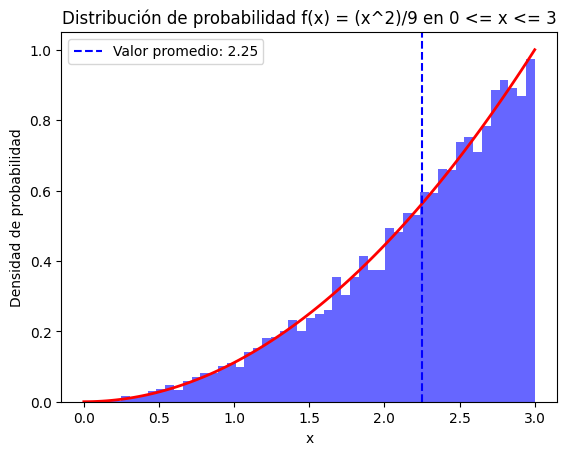

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función inversa para generar valores de la distribución
def generar_valor():
    u = np.random.rand()  # Generar número aleatorio uniforme en [0, 1]
    return np.cbrt(27 * u)  # Aplicar la inversa de la CDF

# Generar una muestra de valores de la distribución
n = 10000
valores = [generar_valor() for _ in range(n)]

# Calcular el valor promedio de la muestra
valor_promedio = np.mean(valores)

# Graficar histograma de la muestra
plt.hist(valores, bins=50, density=True, alpha=0.6, color='b')

# Graficar la función de densidad de probabilidad (PDF)
x = np.linspace(0, 3, 100)
y = x**2 / 9
plt.plot(x, y, 'r', linewidth=2)

# Marcar el valor promedio en la gráfica
plt.axvline(x=valor_promedio, color='b', linestyle='--', label=f'Valor promedio: {valor_promedio:.2f}')

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de probabilidad f(x) = (x^2)/9 en 0 <= x <= 3')
plt.legend()
plt.show()


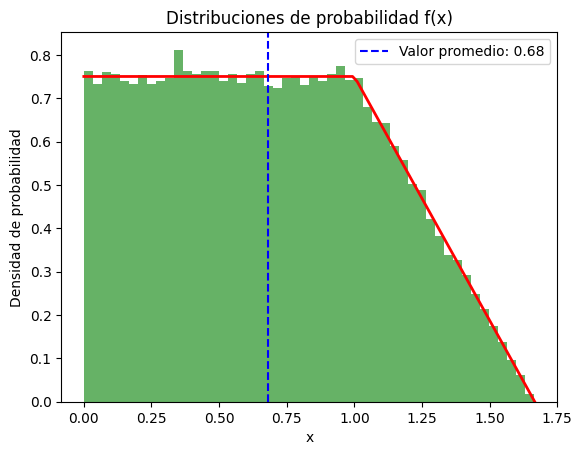

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    if 0 <= x <= 1:
        return 3/4
    elif 1 < x <= 5/3:
        return -9/8*x + 15/8
    else:
        return 0

def generar_valor():
    while True:
        x = np.random.uniform(0, 5/3)  # Generar x en el intervalo [0, 5/3]
        u = np.random.uniform(0, 3/4)  # Generar u en el intervalo [0, 3/4]
        if u <= f(x):
            return x

# Generar una muestra de valores de la distribución
n = 100000
valores = [generar_valor() for _ in range(n)]

# Calcular el valor promedio de la muestra
valor_promedio = np.mean(valores)

# Graficar histograma de la muestra
plt.hist(valores, bins=50, density=True, alpha=0.6, color='g')

# Graficar las funciones de densidad de probabilidad (PDF)
x = np.linspace(0, 5/3, 100)
y = [f(xi) for xi in x]
plt.plot(x, y, 'r', linewidth=2)

# Marcar el valor promedio en la gráfica
plt.axvline(x=valor_promedio, color='b', linestyle='--', label=f'Valor promedio: {valor_promedio:.2f}')

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones de probabilidad f(x)')
plt.legend()
plt.show()


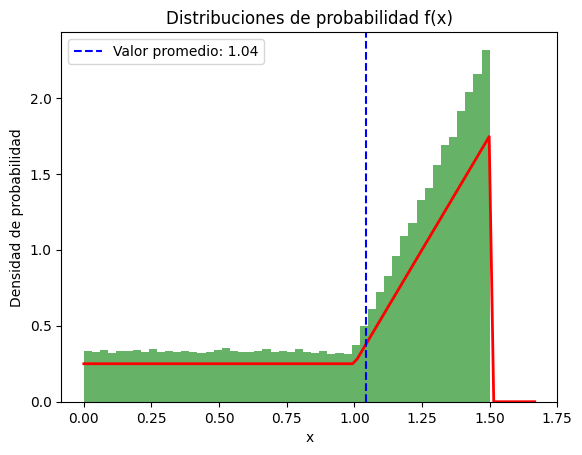

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    if 0 <= x <= 1:
        return 1/4
    elif 1 < x <= 3/2:
        return 3*x - 11/4
    else:
        return 0

def generar_valor():
    while True:
        x = np.random.uniform(0, 3/2)  # Generar x en el intervalo [0, 5/3]
        u = np.random.uniform(0, 7/4)  # Generar u en el intervalo [0, 3/4]
        if u <= f(x):
            return x

# Generar una muestra de valores de la distribución
n = 100000
valores = [generar_valor() for _ in range(n)]

# Calcular el valor promedio de la muestra
valor_promedio = np.mean(valores)

# Graficar histograma de la muestra
plt.hist(valores, bins=50, density=True, alpha=0.6, color='g')

# Graficar las funciones de densidad de probabilidad (PDF)
x = np.linspace(0, 3/2, 100)
y = [f(xi) for xi in x]
plt.plot(x, y, 'r', linewidth=2)

# Marcar el valor promedio en la gráfica
plt.axvline(x=valor_promedio, color='b', linestyle='--', label=f'Valor promedio: {valor_promedio:.2f}')

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones de probabilidad f(x)')
plt.legend()
plt.show()


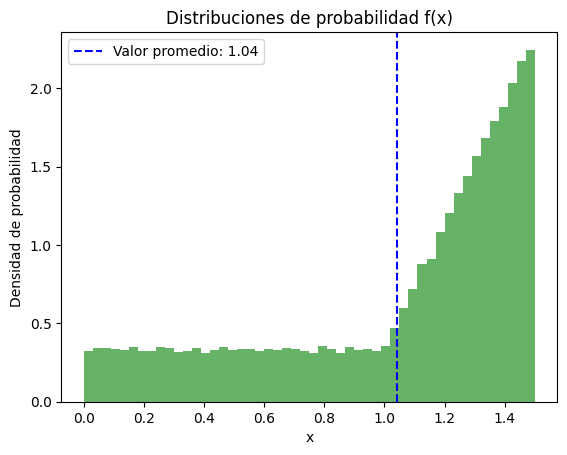

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    if 0 <= x <= 1:
        return 1/4
    elif 1 < x <= 3/2:
        return 3*x - 11/4
    else:
        return 0

def h(x):
    return 7/4  # Función envolvente

def generar_valor():
    while True:
        x = np.random.uniform(0, 3/2)  # Generar x en el intervalo [0, 3/2]
        u = np.random.uniform(0, h(x))  # Generar u en el intervalo [0, h(x)]
        if u <= f(x):
            return x

# Generar una muestra de valores de la distribución
n = 100000
valores = [generar_valor() for _ in range(n)]

# Calcular el valor promedio de la muestra
valor_promedio = np.mean(valores)

# Graficar histograma de la muestra
plt.hist(valores, bins=50, density=True, alpha=0.6, color='g')

# Graficar las funciones de densidad de probabilidad (PDF)
x = np.linspace(0, 3/2, 100)
y = [f(xi) for xi in x]


# Marcar el valor promedio en la gráfica
plt.axvline(x=valor_promedio, color='b', linestyle='--', label=f'Valor promedio: {valor_promedio:.2f}')

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones de probabilidad f(x)')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import brentq

# Definir la función de densidad
def pdf(x):
    if 2 <= x <= 3:
        return 0.5 * (x - 2)
    elif 3 < x <= 6:
        return 0.5 * (2 - x / 3)
    else:
        return 0

# Calcular el área total de la distribución
total_area, _ = quad(pdf, 2, 6)

# Definir la función de distribución acumulativa (CDF)
def cdf(x):
    if x <= 2:
        return 0
    elif 2 < x <= 3:
        area, _ = quad(pdf, 2, x)
        return area / total_area
    elif 3 < x <= 6:
        area, _ = quad(pdf, 2, 3)
        area += quad(pdf, 3, x)[0]
        return area / total_area
    else:
        return 1

# Definir la función inversa de la CDF (para generar variables aleatorias)
def inverse_cdf(u):
    if u <= cdf(2):
        return 2
    elif cdf(2) < u <= cdf(3):
        return brentq(lambda x: cdf(x) - u, 2, 3)
    elif cdf(3) < u <= cdf(6):
        return brentq(lambda x: cdf(x) - u, 3, 6)
    else:
        return 6

# Generar variables aleatorias
num_samples = 10
random_uniform = np.random.uniform(0, 1, num_samples)
random_variables = [inverse_cdf(u) for u in random_uniform]

# Imprimir los valores generados
print("Valores generados:")
print(random_variables)

# Calcular la media de los valores generados
media = np.mean(random_variables)
print("\nMedia de los valores generados:", media)


Valores generados:
[4.396296588710282, 5.29278722541958, 3.934463377275952, 3.097885795329568, 2.9608045233501787, 3.5202416274162083, 3.0782882512761383, 2.9703626083637906, 3.415287009804081, 3.6422895367303556]

Media de los valores generados: 3.6308706543676132
